In [2]:
import pandas as pd
df=pd.read_csv("decision_tree_salariesData.csv",sep="\t")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']

In [5]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()



In [16]:
inputs['company_encoded']=le.fit_transform(inputs['company'])
inputs['degree_encoded']=le.fit_transform(inputs['degree'])
inputs['job_encoded']=le.fit_transform(inputs['job'])
inputs

,company,job,degree,company_encoded,degree_encoded,job_encoded
0,google,sales executive,bachelors,2,0,2
1,google,sales executive,masters,2,1,2
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,1,0
4,google,computer programmer,bachelors,2,0,1
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,1,2
7,abc pharma,computer programmer,bachelors,0,0,1
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,1,0


In [19]:
new_inputs=inputs.drop(['company','job','degree'],axis='columns')
new_inputs

,company_encoded,degree_encoded,job_encoded
0,2,0,2
1,2,1,2
2,2,0,0
3,2,1,0
4,2,0,1
5,2,1,1
6,0,1,2
7,0,0,1
8,0,0,0
9,0,1,0


In [22]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(new_inputs,target)

DecisionTreeClassifier()

In [23]:
model.score(new_inputs,target)

1.0

In [26]:
model.predict([[2,2,0]])

c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

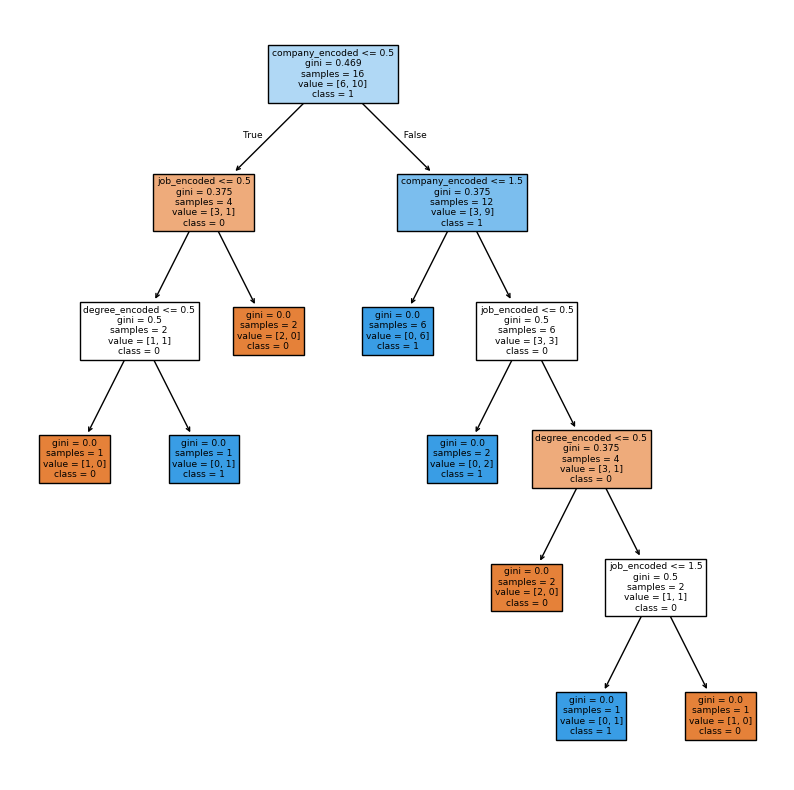

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(model,filled=True,feature_names=new_inputs.columns.tolist(),class_names=target.unique().astype(str).tolist())
plt.show()